<a href="https://colab.research.google.com/github/sudoyolo/israelwar/blob/main/vader_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
df = pd.read_csv('en_data_final.csv')

In [8]:
df = df.drop(df[df['text'] == 'NaN'].index)
df = df.drop([1027, 2068, 3340, 3345, 3497])
df.isna().sum().sort_values(ascending=False)

text           6
Unnamed: 0     0
fullname       0
id             0
likes          0
quotes         0
replies        0
retweets       0
searchQuery    0
timestamp      0
username       0
verified       0
tweets_en      0
dtype: int64

In [10]:
df = df.reset_index()

# SENTIMENT SCORE GENERATOR

In [11]:
scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['tweets_en'].shape[0]):
    compound = analyzer.polarity_scores(df['tweets_en'][i])["compound"]
    pos = analyzer.polarity_scores(df['tweets_en'][i])["pos"]
    neu = analyzer.polarity_scores(df['tweets_en'][i])["neu"]
    neg = analyzer.polarity_scores(df['tweets_en'][i])["neg"]

    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

index  Unnamed: 0                  fullname                   id  likes  \
0      0           0                 OH! MEDIA  1720266274700403081   5312   
1      1           1                      sham  1719276638695792776  65828   
2      2           2             Dr. Eli David  1720042989756486027   2999   
3      3           3  Emelia ᛖᛗᛖᛚᛁᚨ ᛒᛖᚱᚾᚨᛞᛟᛏᛏᛗ  1719822081439711680   8372   
4      4           4            United Nations  1720024940445856083   6313   

   quotes  replies  retweets searchQuery  \
0     181       70      3453        Gaza   
1     200      158     10163        Gaza   
2      92      524       992        Gaza   
3     302      230      8639        Gaza   
4     347     1221      4360        Gaza   

                                                text  \
0  Menteri Pertahanan Perancis, Sebastien Lecornu...   
1  He tweeted this mocking kids in Gaza, and now ...   
2  “Innocent Palestinian civilians” in Gaza celeb...   
3  Let's Not Be Blind to Palestinian Suffering 🕊️...   
4  Gaza: Attacks on hospitals & schools have take...   

                  timestamp       username  verified  \
0  2023-11-03T02:26:00.000Z       @ohtweet      True   
1  2023-10-31T08:54:00.000Z    @bitterarab      True   
2  2023-11-02T11:39:00.000Z    @DrEliDavid      True   
3  2023-11-01T21:01:00.000Z  @Bernadotte22      True   
4  2023-11-02T10:27:00.000Z            @UN      True   

                                           tweets_en  Compound  Positive  \
0  French Defense Minister Sebastien Lecornu said...    0.5267     0.101   
1  He tweeted this mocking kids in Gaza, and now ...   -0.7861     0.084   
2  “Innocent Palestinian civilians” in Gaza celeb...    0.5719     0.104   
3  Let's Not Be Blind to Palestinian Suffering 🕊️...    0.6710     0.218   
4  Gaza: Attacks on hospitals & schools have take...   -0.7351     0.075   

   Negative  Neutral  
0     0.000    0.899  
1     0.359    0.557  
2     0.000    0.896  
3     0.155    0.627  
4     0.179    0.746

# CLASSIFYING TWEETS AS POSITIVE, NEGATIVE OR NEUTRAL

In [12]:
conditions = [
    (df['Compound'] <= -0.5),
    (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
    (df['Compound'] > 0.5)
    ]

values = ['Negative', 'Neutral', 'Positive']

df['Category'] = np.select(conditions, values)
df.head()

index  Unnamed: 0                  fullname                   id  likes  \
0      0           0                 OH! MEDIA  1720266274700403081   5312   
1      1           1                      sham  1719276638695792776  65828   
2      2           2             Dr. Eli David  1720042989756486027   2999   
3      3           3  Emelia ᛖᛗᛖᛚᛁᚨ ᛒᛖᚱᚾᚨᛞᛟᛏᛏᛗ  1719822081439711680   8372   
4      4           4            United Nations  1720024940445856083   6313   

   quotes  replies  retweets searchQuery  \
0     181       70      3453        Gaza   
1     200      158     10163        Gaza   
2      92      524       992        Gaza   
3     302      230      8639        Gaza   
4     347     1221      4360        Gaza   

                                                text  \
0  Menteri Pertahanan Perancis, Sebastien Lecornu...   
1  He tweeted this mocking kids in Gaza, and now ...   
2  “Innocent Palestinian civilians” in Gaza celeb...   
3  Let's Not Be Blind to Palestinian Suffering 🕊️...   
4  Gaza: Attacks on hospitals & schools have take...   

                  timestamp       username  verified  \
0  2023-11-03T02:26:00.000Z       @ohtweet      True   
1  2023-10-31T08:54:00.000Z    @bitterarab      True   
2  2023-11-02T11:39:00.000Z    @DrEliDavid      True   
3  2023-11-01T21:01:00.000Z  @Bernadotte22      True   
4  2023-11-02T10:27:00.000Z            @UN      True   

                                           tweets_en  Compound  Positive  \
0  French Defense Minister Sebastien Lecornu said...    0.5267     0.101   
1  He tweeted this mocking kids in Gaza, and now ...   -0.7861     0.084   
2  “Innocent Palestinian civilians” in Gaza celeb...    0.5719     0.104   
3  Let's Not Be Blind to Palestinian Suffering 🕊️...    0.6710     0.218   
4  Gaza: Attacks on hospitals & schools have take...   -0.7351     0.075   

   Negative  Neutral  Category  
0     0.000    0.899  Positive  
1     0.359    0.557  Negative  
2     0.000    0.896  Positive  
3     0.155    0.627  Positive  
4     0.179    0.746  Negative

In [13]:
pd.DataFrame(df.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

Counts  Percentage
Category                    
Negative    1515   37.922403
Neutral     1871   46.833542
Positive     609   15.244055

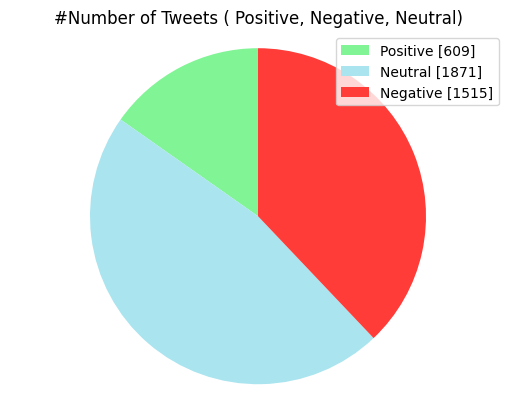

In [14]:
positive=609
neutral=1871
negative=1515

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral)' )
plt.axis('equal')
plt.show()

In [17]:
df['text_len'] = df['tweets_en'].astype(str).apply(len)
df['text_word_count'] = df['tweets_en'].apply(lambda x: len(str(x).split()))
print("Average length of tweets:", round(np.mean(df['text_len'])))
print("Average word counts of tweets:", round(np.mean(df['text_word_count'])))

Average length of tweets: 217
Average word counts of tweets: 35


TOP 50 POSITIVE TWEETS

In [19]:
df.nlargest(n=50, columns=['Compound'])["tweets_en"]

1061    BREAKING: 🇺🇳 Today’s UN vote to end 🇺🇸 US emba...
2410    Stop 🛑 and Read 👇\n\nIndian Muslim Friend: Pra...
2701    I always knew that EXO-Ls were cute and beauti...
2569    When I see the videos of the carcasses sent to...
1518    Mujahideen of Al Qassam.🇵🇸\n\nOh, he fell to t...
2378    Pride for every Kuwaiti, male and female❗️\n\n...
3759    Bismillah may Allah SWT always protect our bro...
1382    Assalamu alaikum\nBismillahirrahmanirrahim\nYa...
2787    Oh God, grant the people of Palestine victory,...
1184    FREE PALESTINE\nFREE PALESTINE\nFREE PALESTINE...
2817    The popular Hausa Singer & actor— @lilinbaba_ ...
820     🇮🇱 Israelis are actually the nicest people on ...
2044    📣 POIGNANT MESSAGE THAT NEEDS TO BE HEARD‼️⬇️\...
1429    May God increase your favor and increase your ...
3830    Somehow, amid risking his own life to document...
3781    Wow! Masterly. I am Jewish and truly no one ha...
3580    😍Which Idol would you like to go on a picnic w...
647     “May G

TOP 50 NEGATIVE TWEETS

In [20]:
df.nsmallest(n=50, columns=['Compound'])["tweets_en"]

967     In the last few hours, over 130 terrorists hav...
1253    🔴 RECAP #Israel #Palestine (as of 23:00 GMT, 2...
3500    B'Tselem, the Israeli Information Center for H...
1174    Biden ‘Countering Islamophobia’ While Incinera...
306     Palestine TV journalist Mohammad Abu Hattab wa...
1148    I visited Israel/Palestine in 2008. Tel Aviv, ...
2435    For the first time since the war in Israel was...
145     Let the volunteer Israeli dogs who flock under...
3758    Why Didn't God Immediately Destroy Israel?\n\n...
940     Today Iran becomes chair of a UN human rights ...
228     In the wake of the horrific massacre by Gaza-b...
3884    THE GENOCIDE\n \n1. The Israelis have killed 8...
706     Take Them At Their Words\n\nIranian Foreign Mi...
1289    No, the media will not show the truth about th...
3411    Kafr Qassem Massacre:\n\nIn october 29, 1956 I...
453     Where are the thousands, millions of innocent ...
1721    For the first time in history, a Speaker of th...
3938    I actu

# VISUALIZING SENTIMENT SCORES OF POSITIVE, NEUTRAL AND NEGATIVE TWEETS

<Axes: xlabel='Neutral', ylabel='Density'>

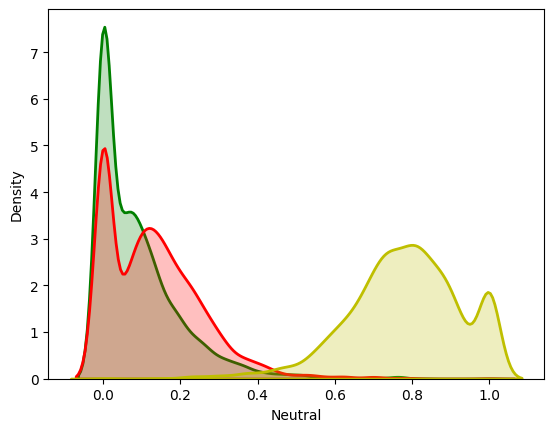

In [21]:
sns.distplot(df["Positive"], hist=False, kde=True,
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Negative"], hist=False, kde=True,
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Neutral"], hist=False, kde=True,
             bins=int(180/5), color = 'y',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

# VISUALIZATION OF SENTIMENT SCORES

<Axes: xlabel='Compound', ylabel='Density'>

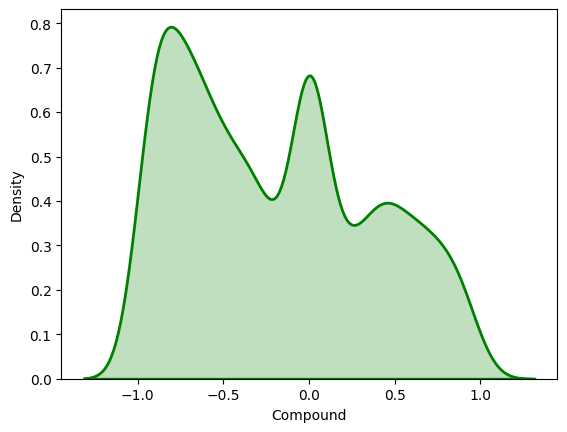

In [22]:
sns.distplot(df["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

# WORCLOUD

ALL SENTIMENTS

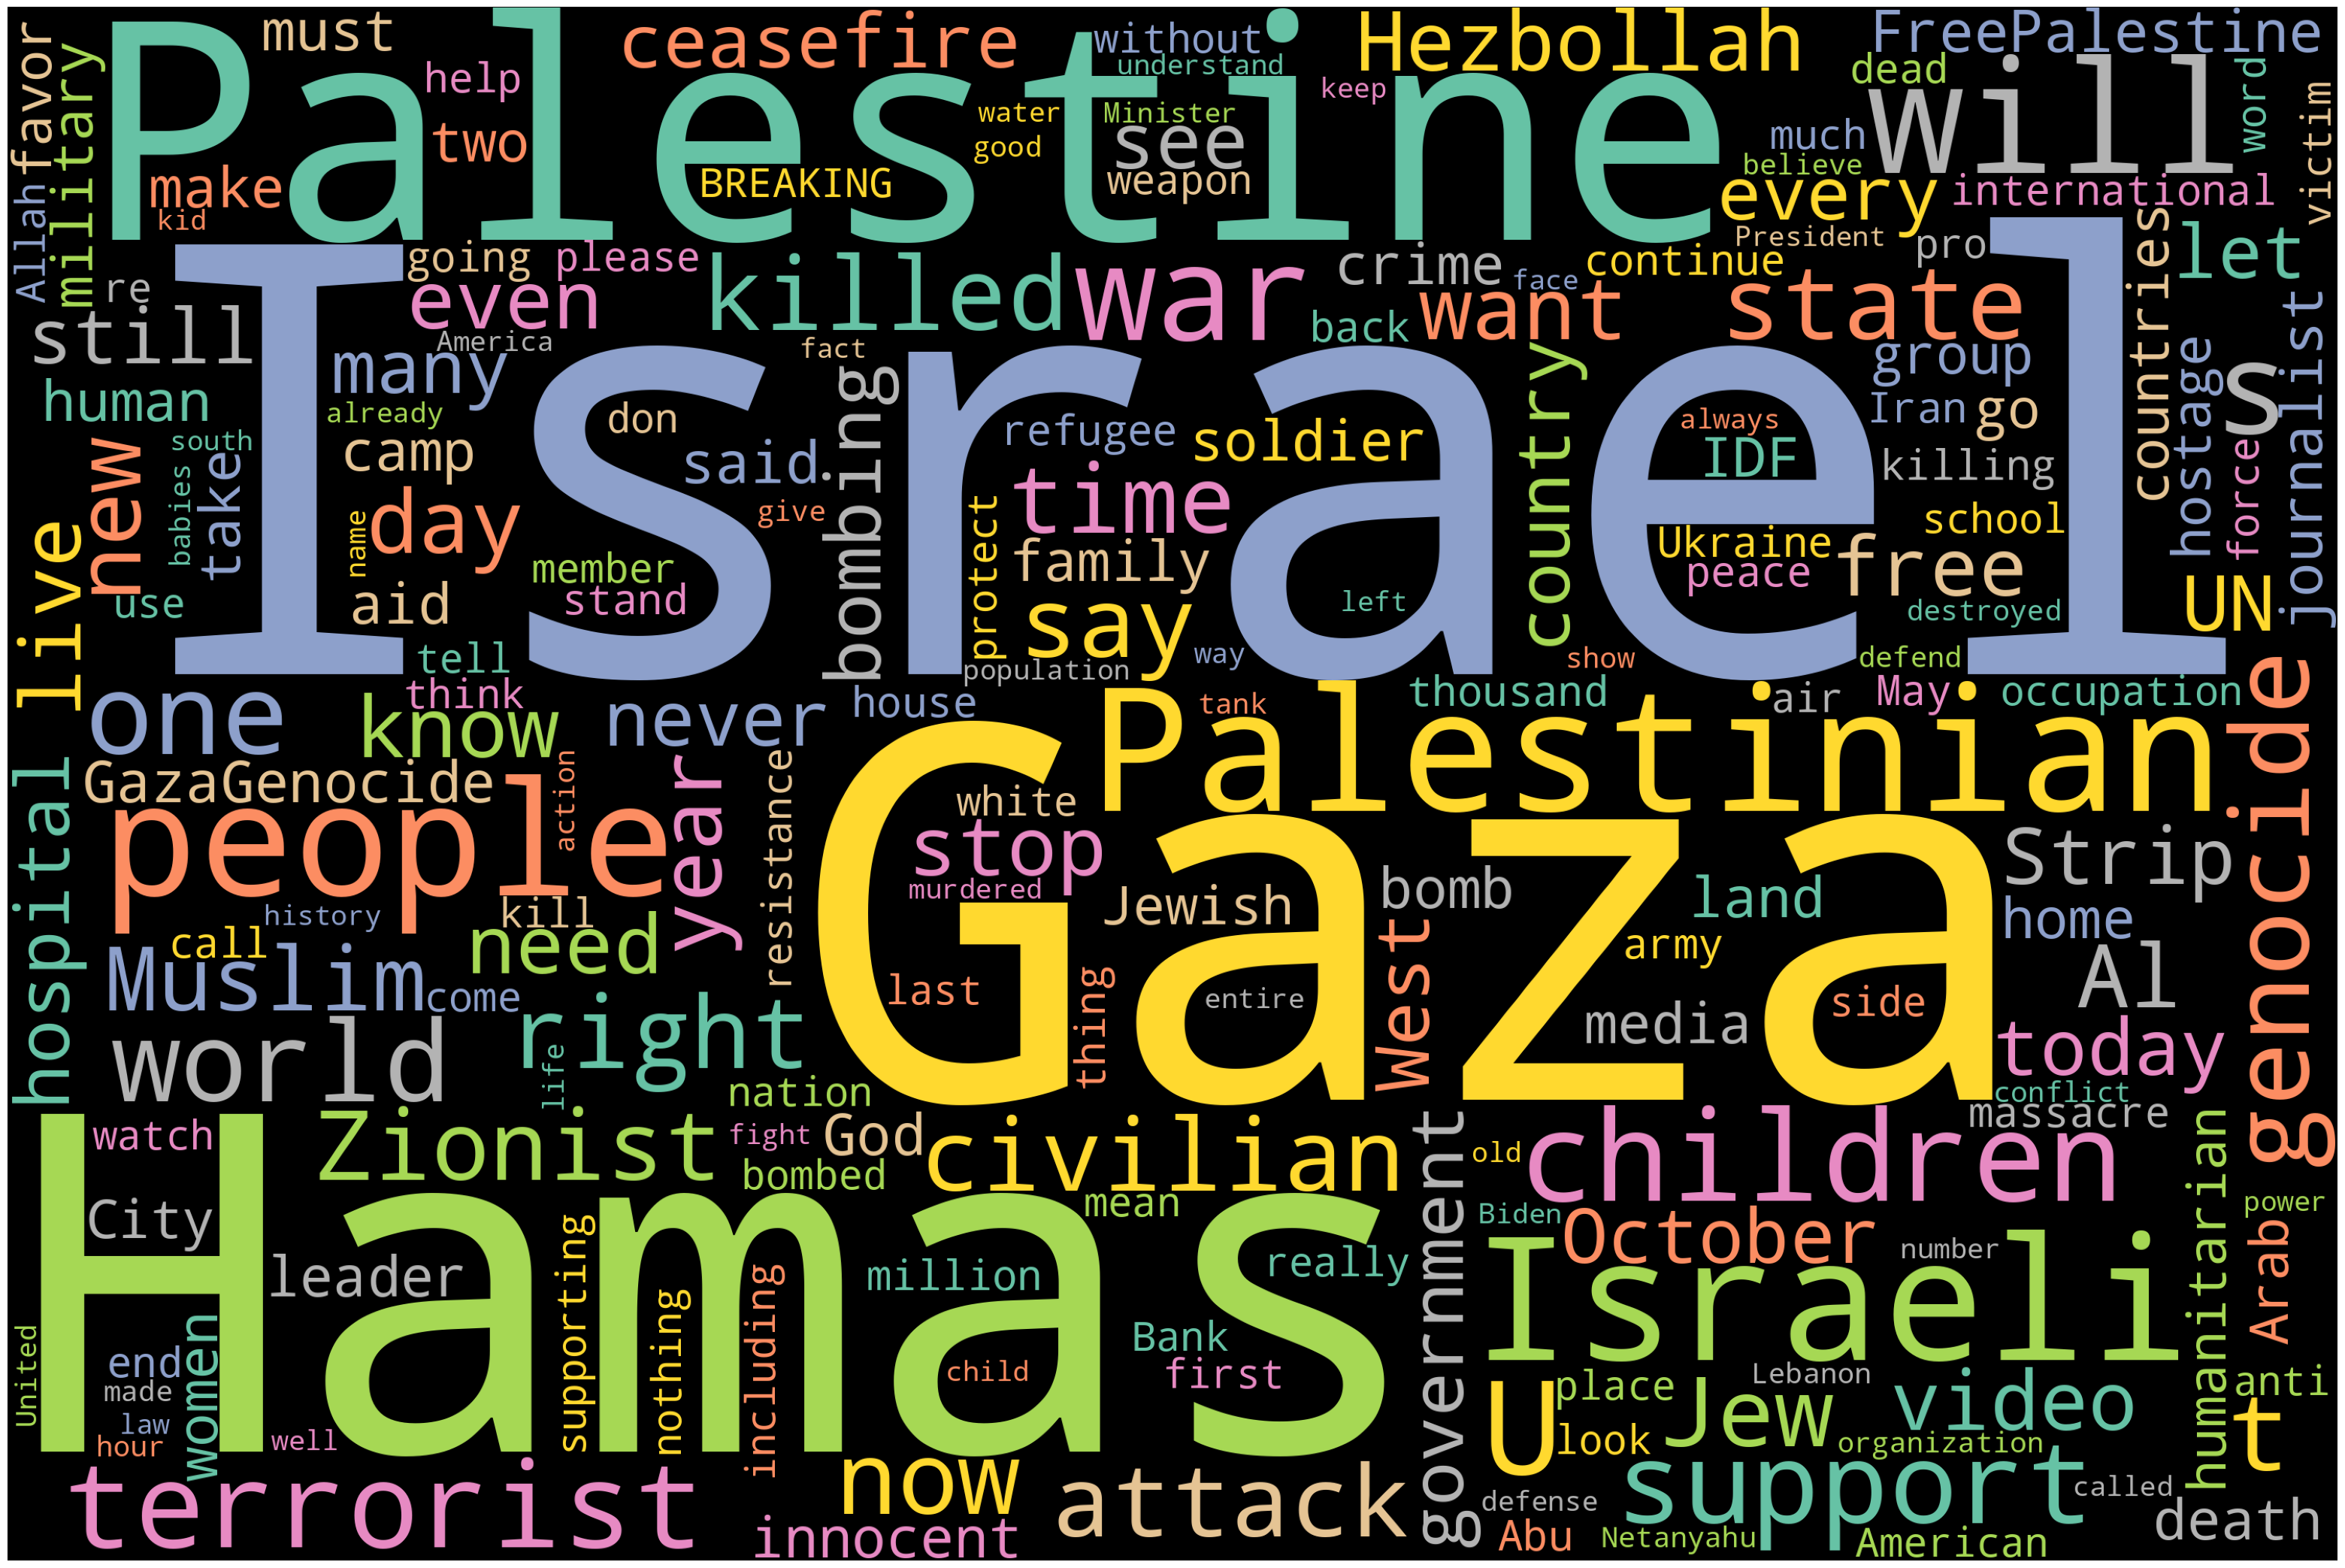

In [24]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

text = " ".join(review for review in df.tweets_en)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)

plot_cloud(wordcloud)

POSTIVE

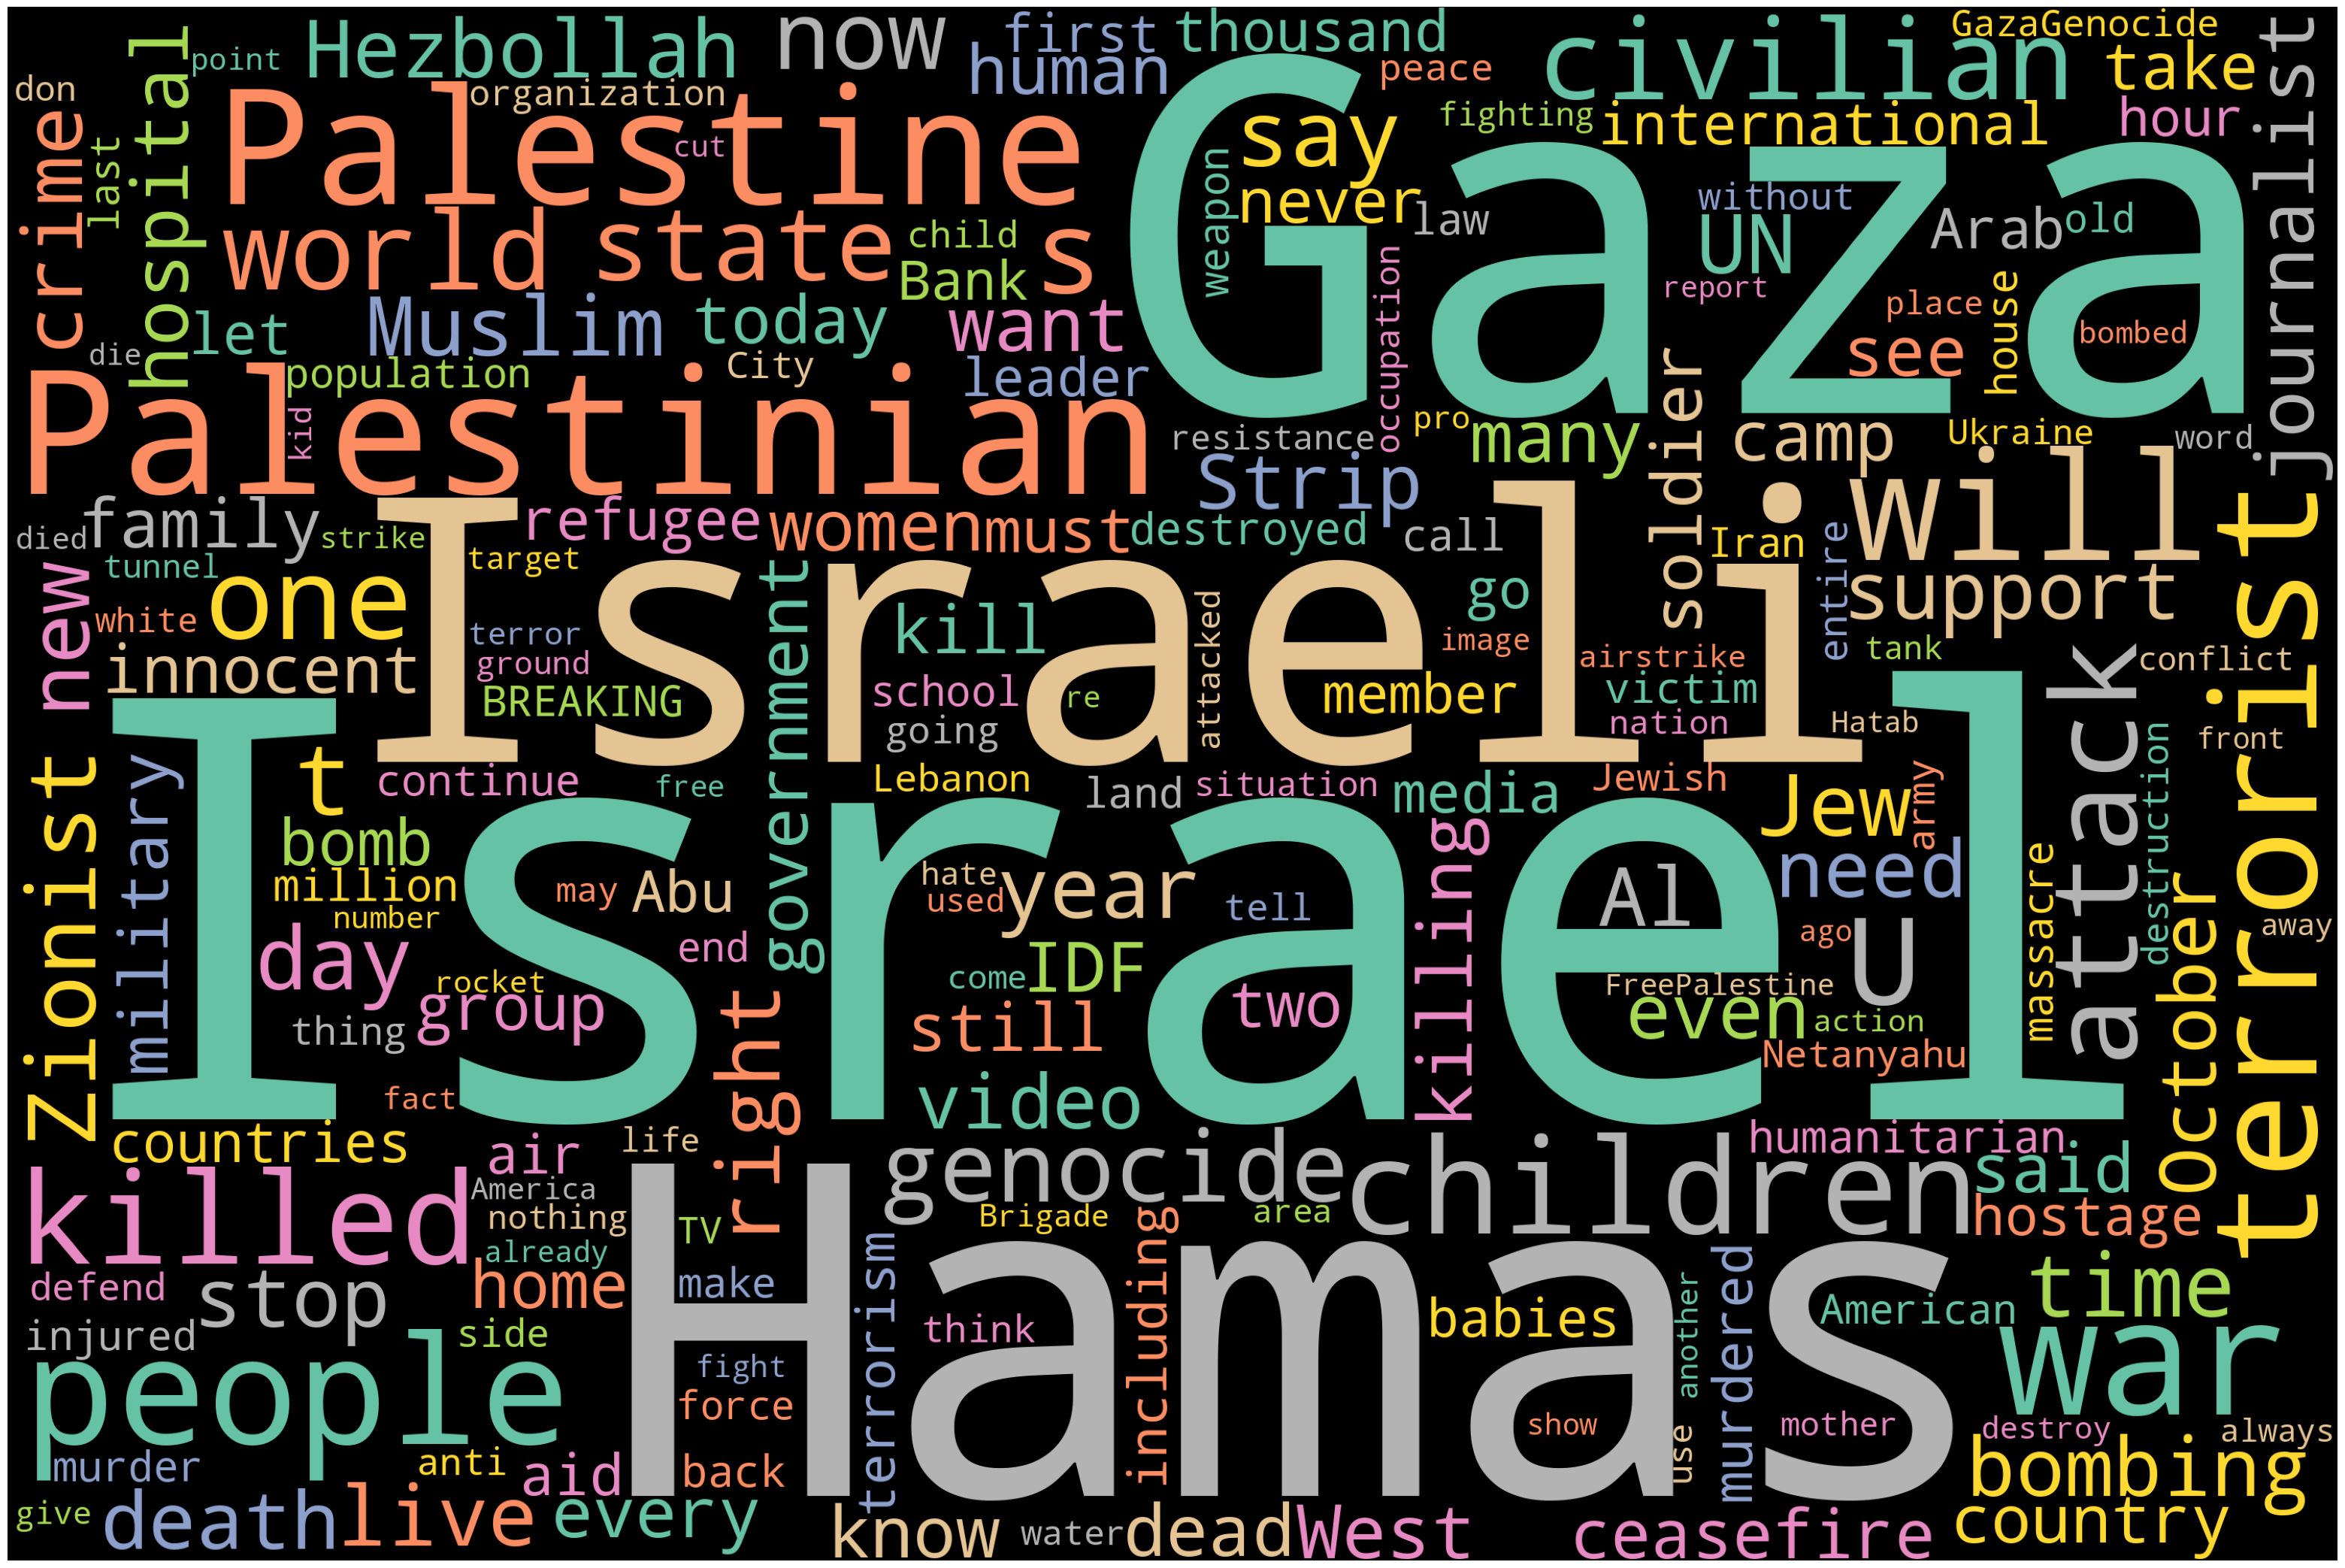

In [27]:
text = " ".join(review for review in df[df['Category']=='Negative'].tweets_en)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
plot_cloud(wordcloud)

NEGATIVE

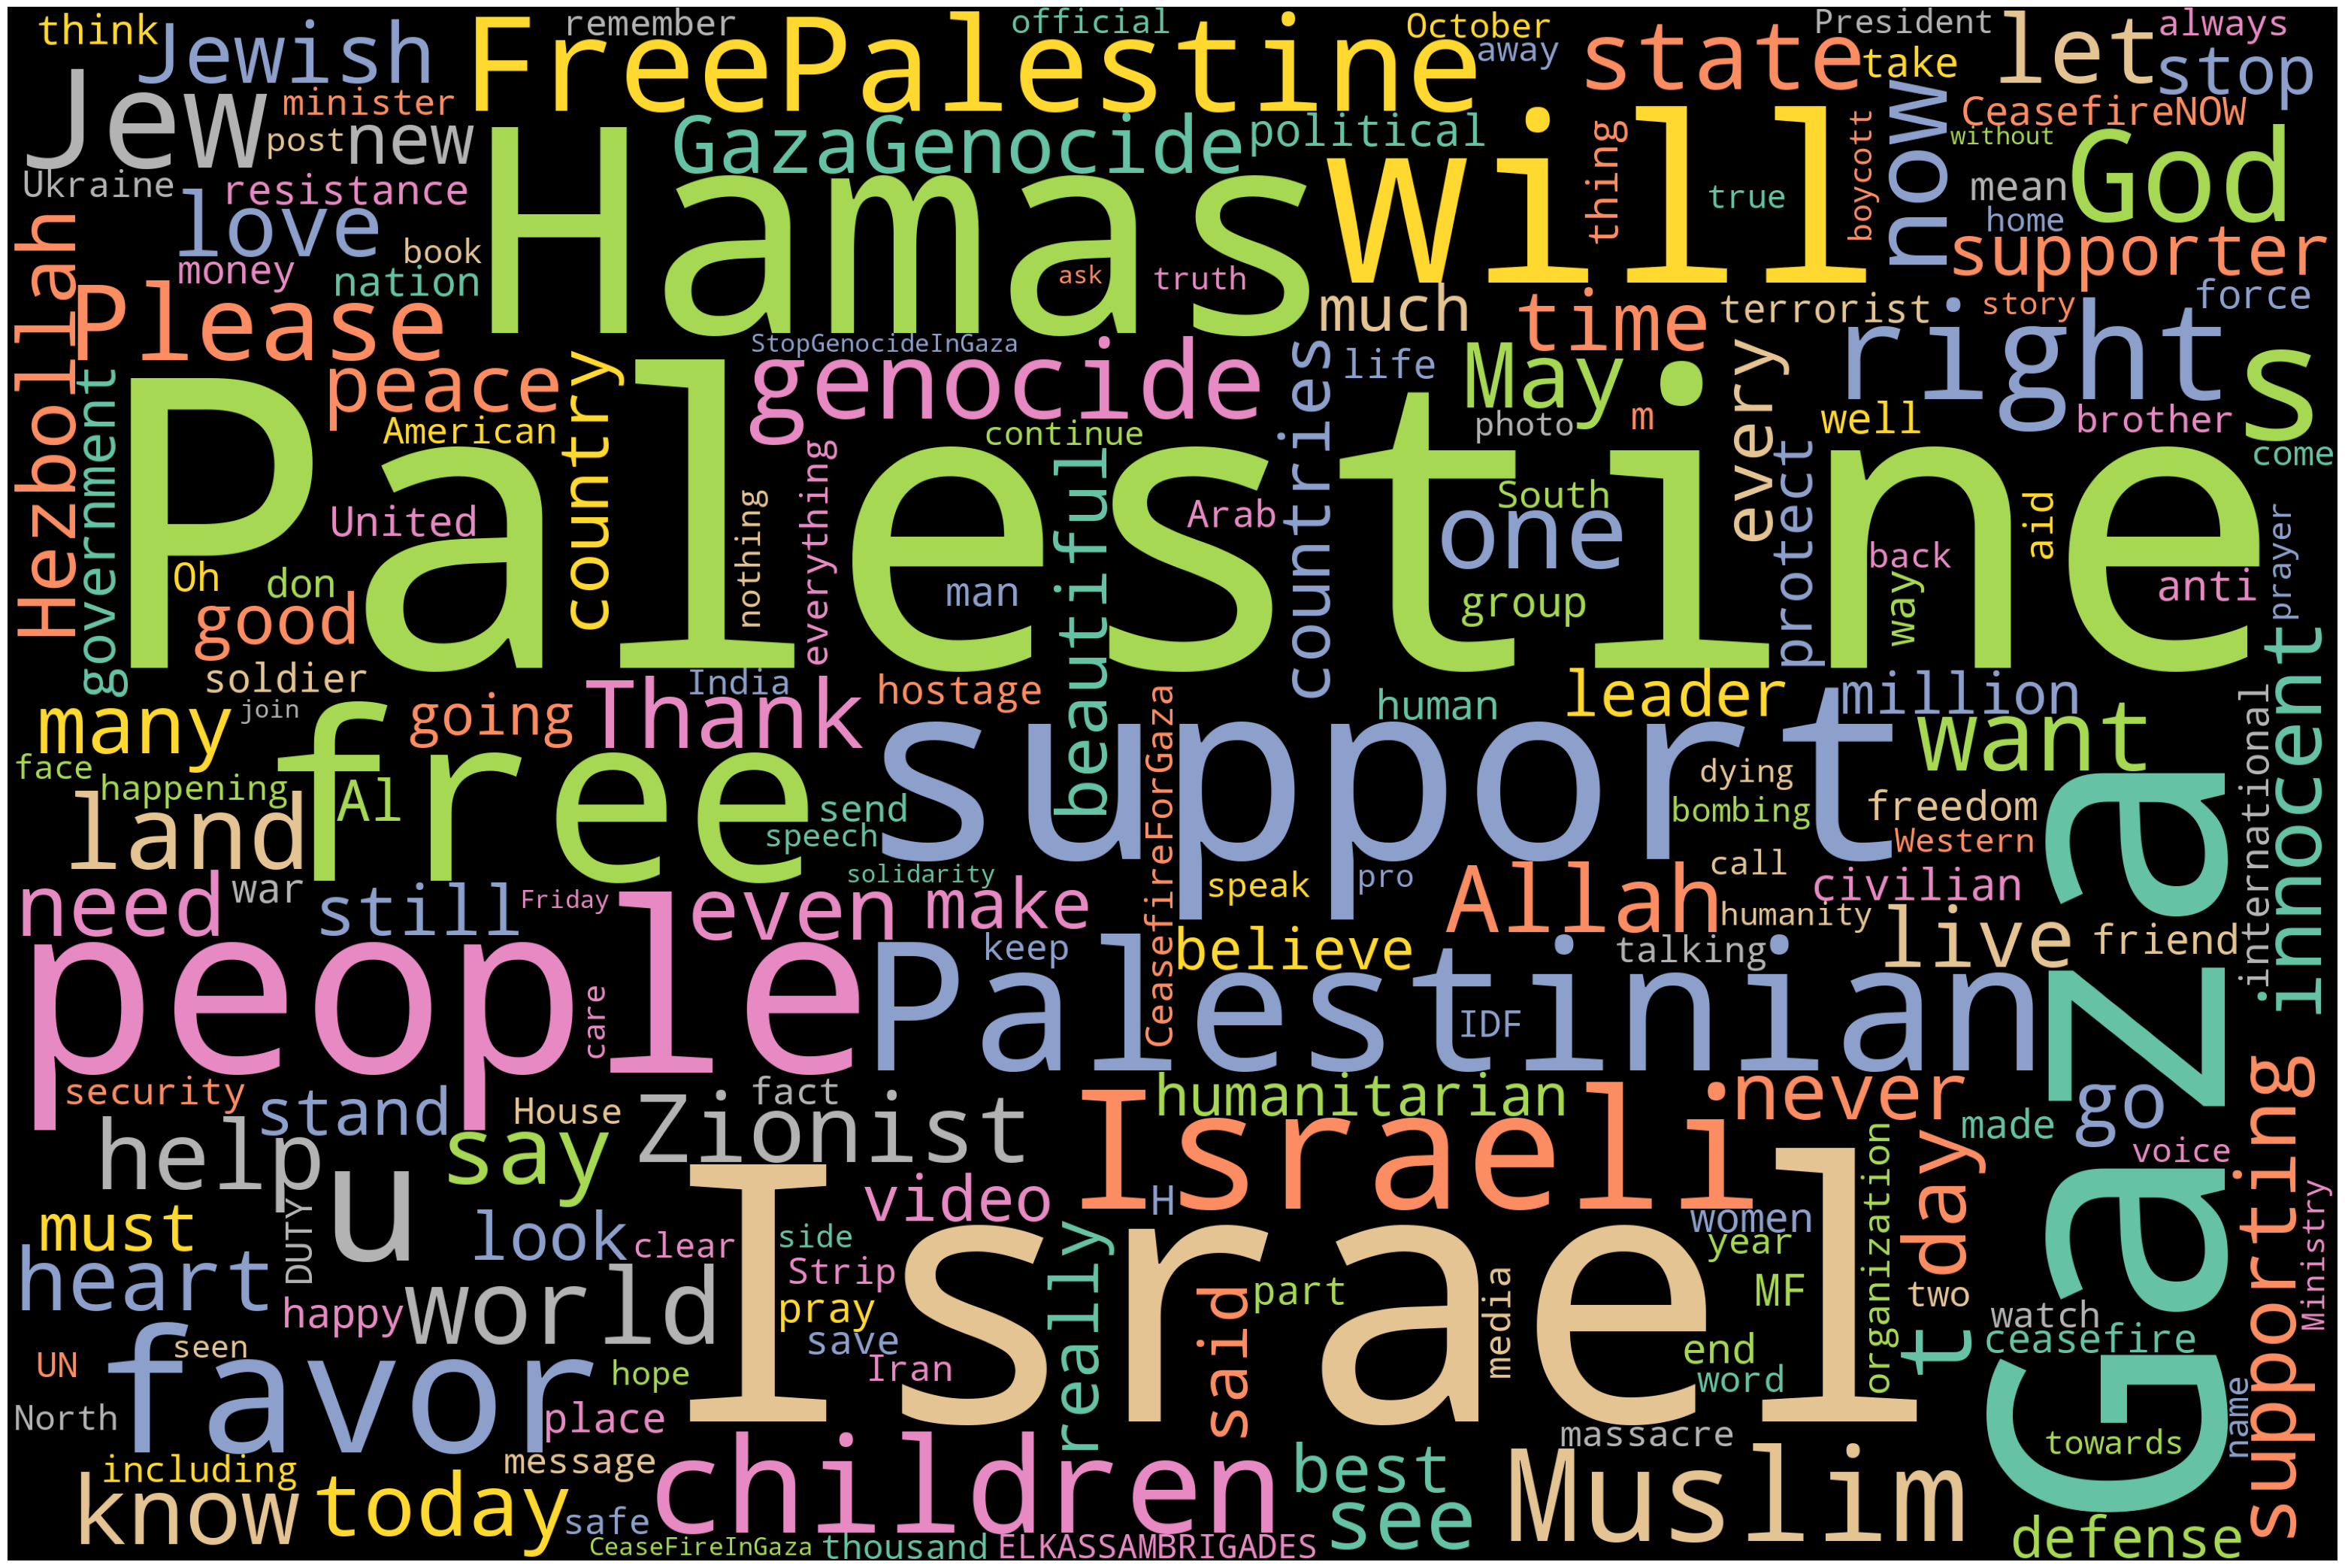

In [29]:
text = " ".join(review for review in df[df['Category']=='Positive'].tweets_en)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
plot_cloud(wordcloud)

NEUTRAL

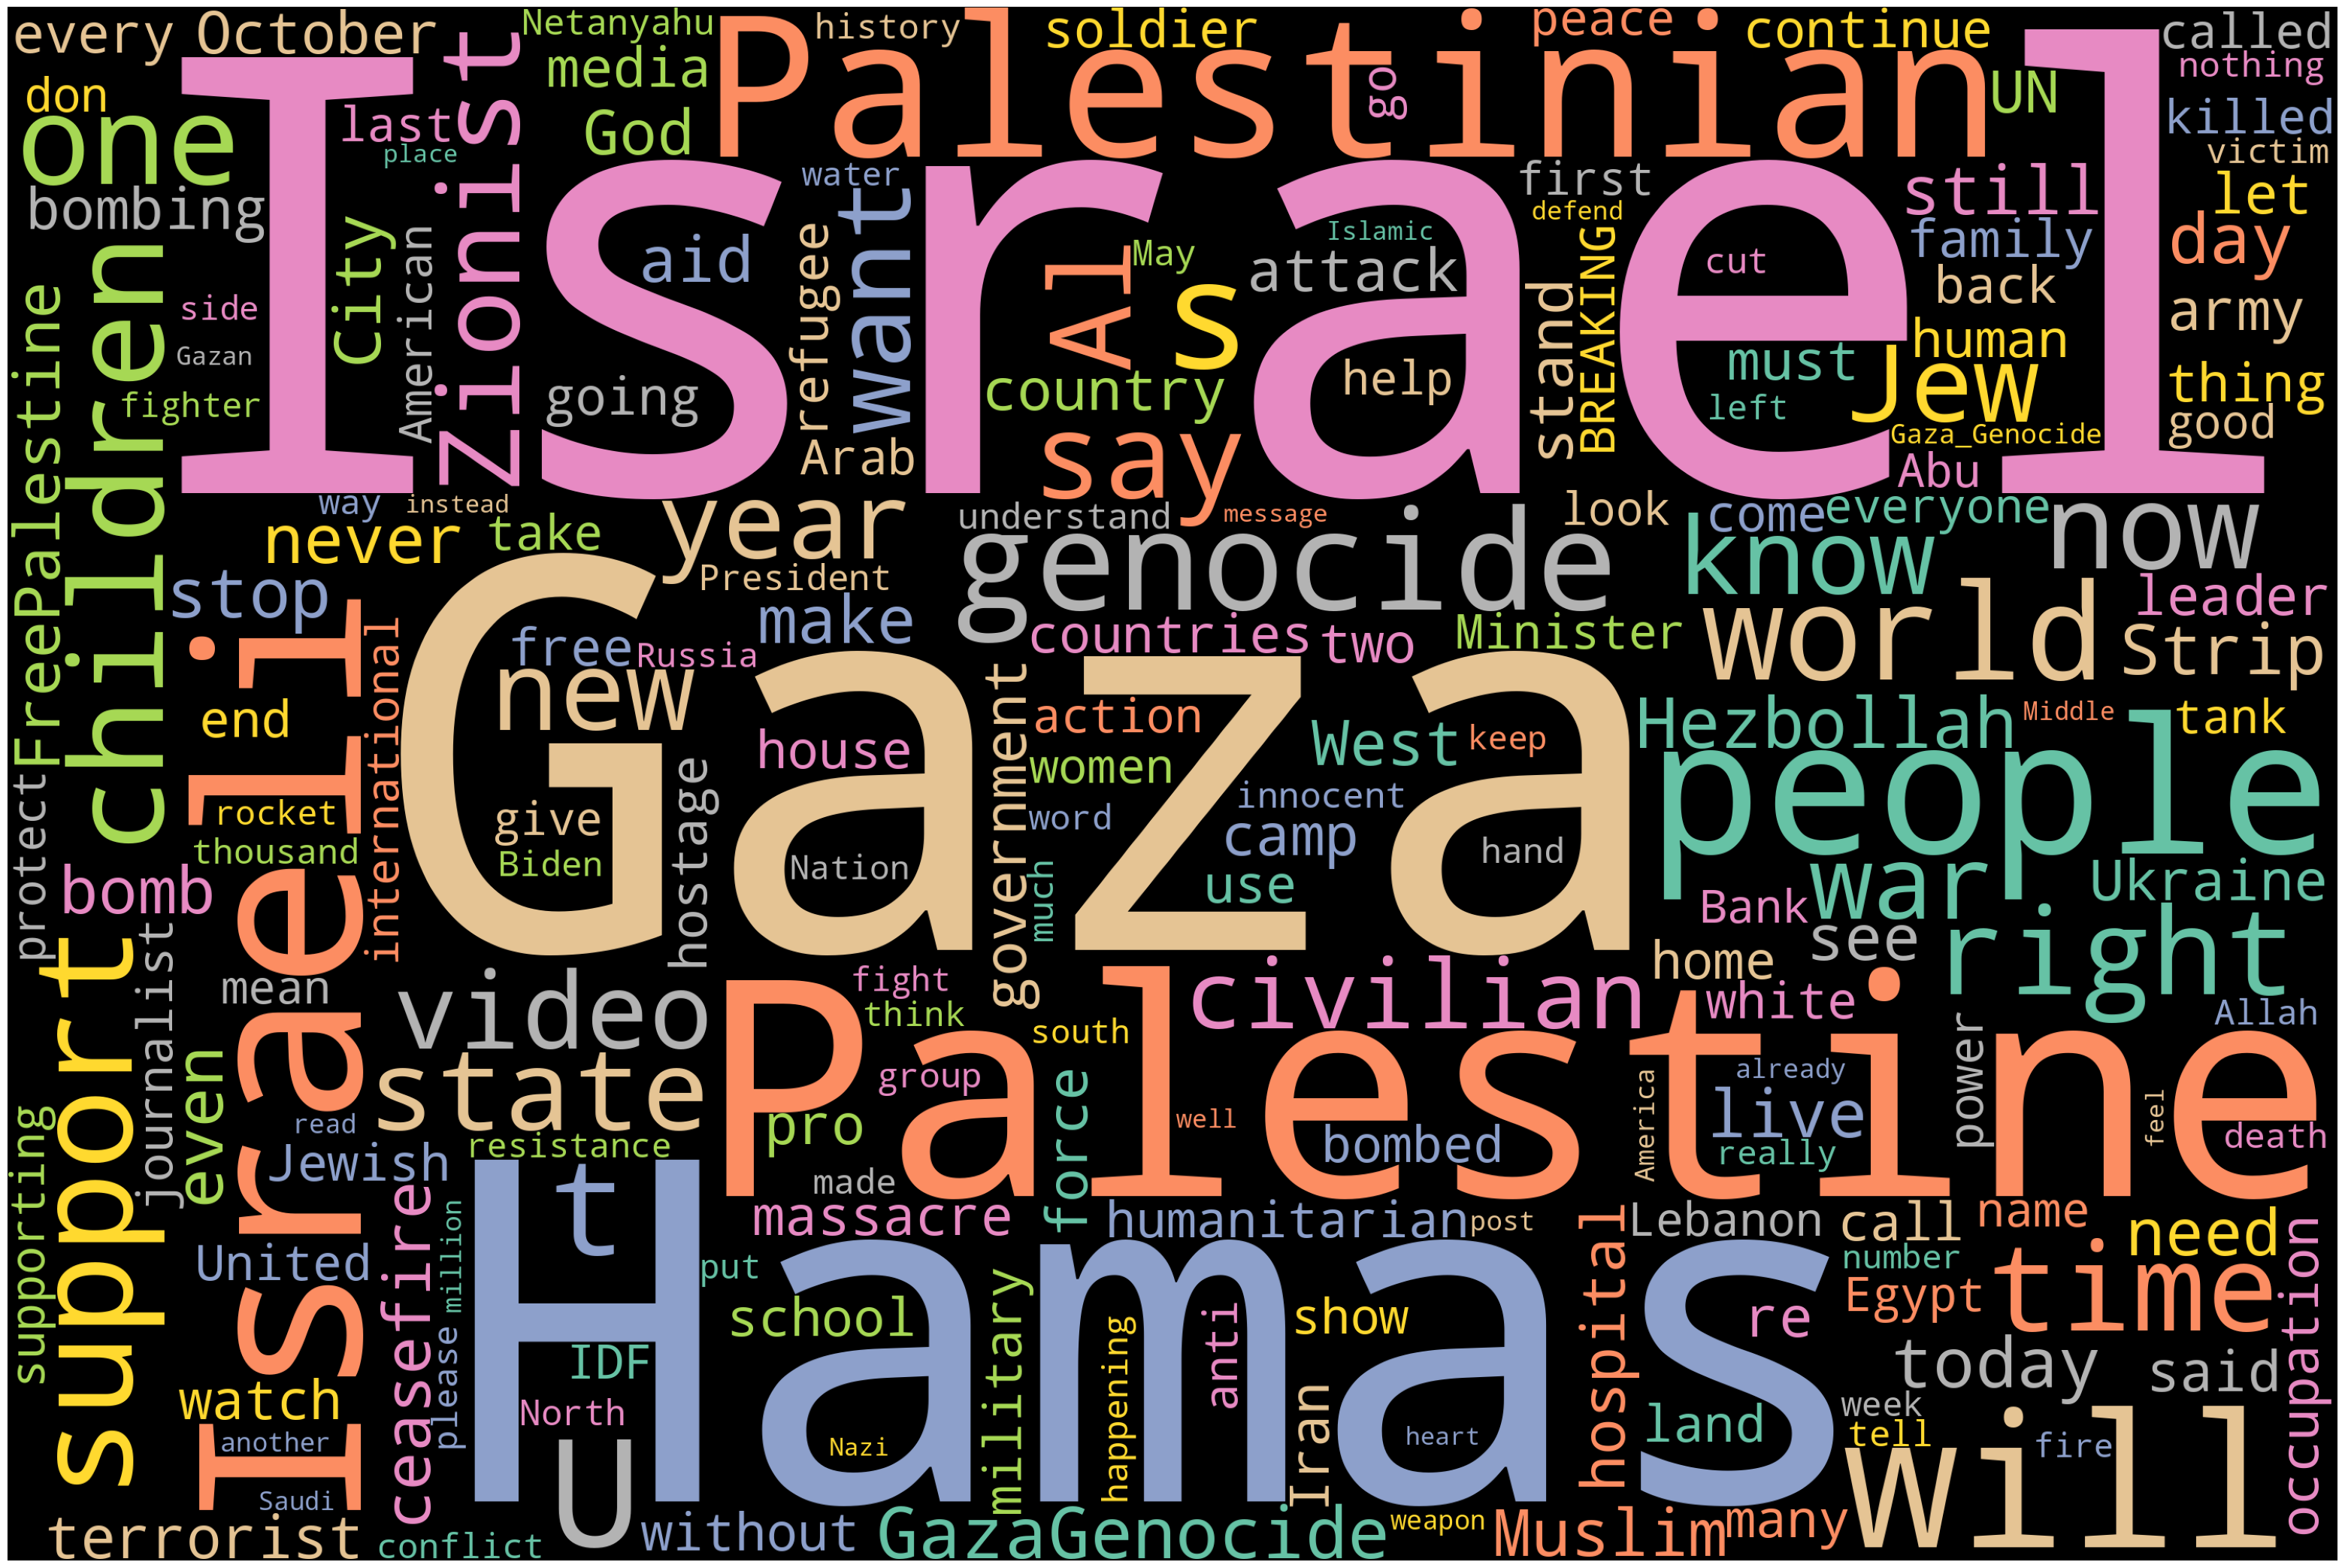

In [30]:
text = " ".join(review for review in df[df['Category']=='Neutral'].tweets_en)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
plot_cloud(wordcloud)

# HASHTAG ANALYSIS

POSITIVE

In [31]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['tweets_en'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive[0:10]

['Gaza',
 'Palestine',
 'StandWithPalestine',
 'HumanityForGaza',
 'boycott',
 'Israel',
 'Bangladesh',
 'Gazagenocide',
 'FreePalestine',
 'StopGazaGenocide']

NEGATIVE

In [32]:
HT_negative = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_negative  = hashtag_extract(df['tweets_en'][df['Compound'] < -0.5])
# unnesting list
HT_negative = sum(HT_negative,[])
HT_negative[0:10]

['Israel',
 'Trump',
 'CeasefireForGazaNOW',
 'Zionist',
 'GazaGenocide',
 'PALESTINE',
 'Islam',
 'child',
 'Israeli',
 'Gaza_under_attack']